In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

In [2]:
wine_data = datasets.load_wine()

In [3]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
data = pd.DataFrame(data = wine_data['data'], columns=wine_data['feature_names'])

data['target'] = wine_data['target']

data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0,1
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0,0
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1


In [6]:
data.shape

(178, 14)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

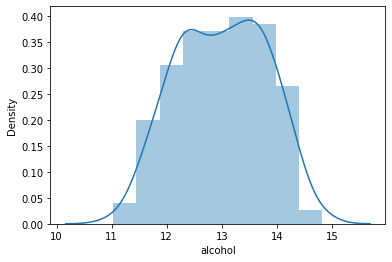

In [10]:
sns.distplot(data['alcohol'], kde=1)

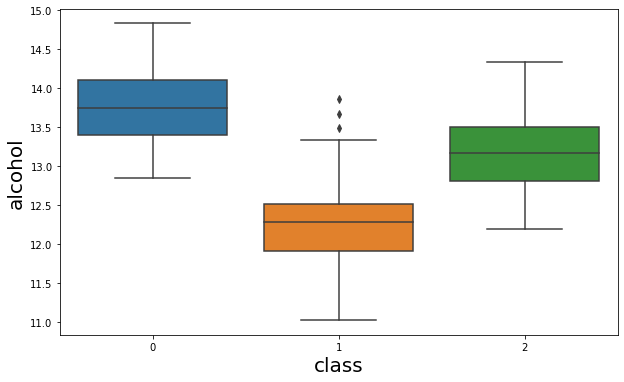

In [11]:
plt.figure(figsize=(10, 6))

sns.boxplot('target', 'alcohol', data = data)

plt.xlabel('class', fontsize = 20)
plt.ylabel('alcohol', fontsize = 20)

plt.show()

In [12]:
features = data.drop('target', axis=1)

target = data[['target']]

In [13]:
features

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [14]:
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [15]:
target = to_categorical(target, 3)

In [16]:
standardScaler = StandardScaler()

processed_features = pd.DataFrame(standardScaler.fit_transform(features),
                                  columns=features.columns,
                                  index=features.index)

processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


In [17]:
x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=1)

In [18]:
x_train.shape, y_train.shape

((142, 13), (142, 3))

In [19]:
x_test.shape, y_test.shape

((36, 13), (36, 3))

In [20]:
class WineClassificationModel(Model):

    def __init__(self, input_shape):

        super(WineClassificationModel, self).__init__()

        self.d1 = layers.Dense(128, activation = 'relu', input_shape = [input_shape])
        self.d2 = layers.Dense(64, activation='relu')

        self.d3 = layers.Dense(3, activation='softmax')

    def call(self, x):
        
        x = self.d1(x)
        x = self.d2(x)

        x = self.d3(x)

        return x

In [21]:
model = WineClassificationModel(x_train.shape[1])

model.compile(optimizer=keras.optimizers.SGD(lr = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
num_epochs = 500

In [23]:
training_history = model.fit(x_train.values,
                             y_train,
                             validation_split=0.2,
                             epochs=num_epochs,
                             batch_size=48)

===========================] - 0s 37ms/step - loss: 0.3853 - accuracy: 0.9823 - val_loss: 0.5167 - val_accuracy: 0.9310
Epoch 361/500
3/3 [==============================] - 0s 36ms/step - loss: 0.3842 - accuracy: 0.9823 - val_loss: 0.5156 - val_accuracy: 0.9310
Epoch 362/500
3/3 [==============================] - 0s 39ms/step - loss: 0.3831 - accuracy: 0.9823 - val_loss: 0.5145 - val_accuracy: 0.9310
Epoch 363/500
3/3 [==============================] - 0s 36ms/step - loss: 0.3820 - accuracy: 0.9823 - val_loss: 0.5135 - val_accuracy: 0.9310
Epoch 364/500
3/3 [==============================] - 0s 30ms/step - loss: 0.3810 - accuracy: 0.9823 - val_loss: 0.5123 - val_accuracy: 0.9310
Epoch 365/500
3/3 [==============================] - 0s 34ms/step - loss: 0.3798 - accuracy: 0.9823 - val_loss: 0.5112 - val_accuracy: 0.9310
Epoch 366/500
3/3 [==============================] - 0s 32ms/step - loss: 0.3788 - accuracy: 0.9823 - val_loss: 0.5101 - val_accuracy: 0.9310
Epoch 367/500
3/3 [=========

In [24]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

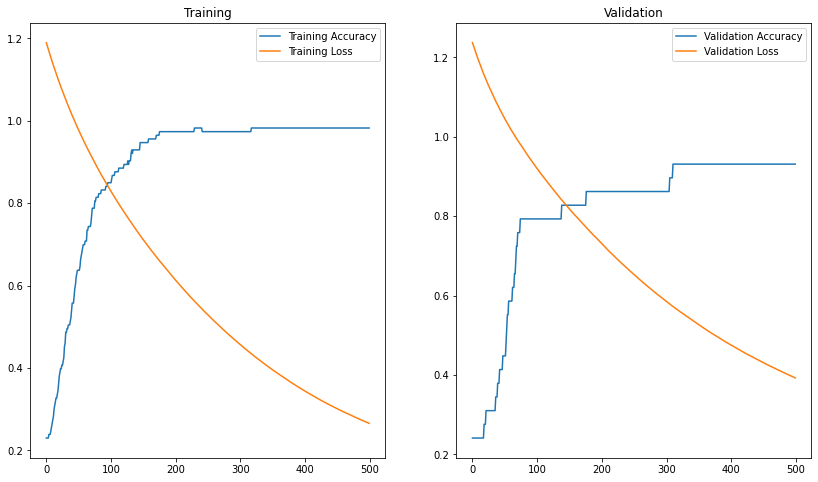

In [25]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

val_acc = training_history.history['val_accuracy']
val_loss = training_history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label = 'Training Accuracy')
plt.plot(epochs_range, train_loss, label = 'Training Loss')

plt.title('Training')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.title('Validation')
plt.legend()

In [26]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2/2 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.9444


loss        0.298720
accuracy    0.944444
dtype: float64

In [27]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.10288565, 0.15609433, 0.7410201 ],
       [0.09156661, 0.8079704 , 0.10046296],
       [0.86249113, 0.07328336, 0.06422549],
       [0.14742734, 0.79198945, 0.06058322],
       [0.9523357 , 0.01834651, 0.02931781],
       [0.11344893, 0.20118847, 0.6853626 ],
       [0.14054263, 0.62582004, 0.23363723],
       [0.97672164, 0.01361848, 0.00965983],
       [0.0653827 , 0.16547309, 0.7691442 ],
       [0.10028439, 0.7301826 , 0.16953297]], dtype=float32)

In [28]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [29]:
y_pred[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [30]:
pd.DataFrame(y_pred)

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


In [31]:
accuracy_score(y_test, y_pred)

0.9444444444444444